--- Data Description ---
   anime_id                         title  score  rank  popularity  members  \
0     28977                      Gintama°   9.05     8         347   680037   
1     57555  Chainsaw Man Movie: Reze-hen   9.18     2         962   282129   
2     11061        Hunter x Hunter (2011)   9.03     9           8  3107455   
3     52991             Sousou no Frieren   9.29     1         121  1269074   
4      9969                      Gintama'   9.02    11         406   601940   

                                            synopsis  start_date    end_date  \
0  Gintoki, Shinpachi, and Kagura return as the f...  2015-01-01  2016-01-01   
1                           Sequel to Chainsaw Man .  2025-01-01  2025-01-01   
2  Hunters devote themselves to accomplishing haz...  2011-01-01  2014-01-01   
3  During their decade-long quest to defeat the D...  2023-01-01  2024-01-01   
4  After a one-year hiatus, Shinpachi Shimura ret...  2011-01-01  2012-01-01   

    type  episodes 

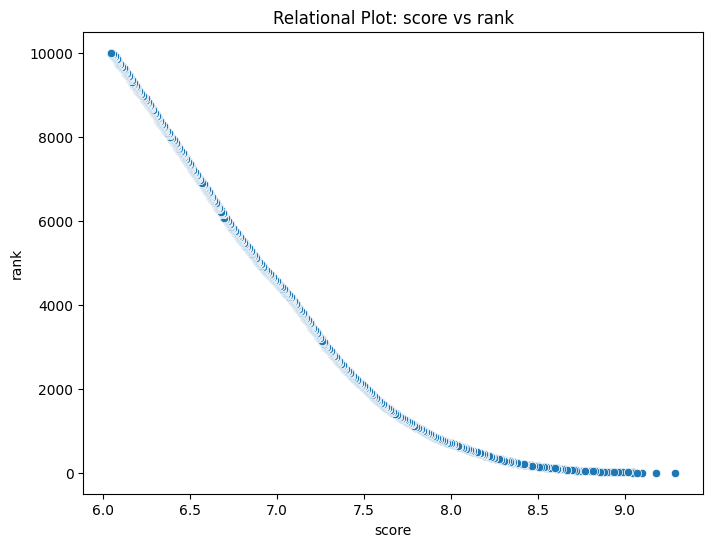

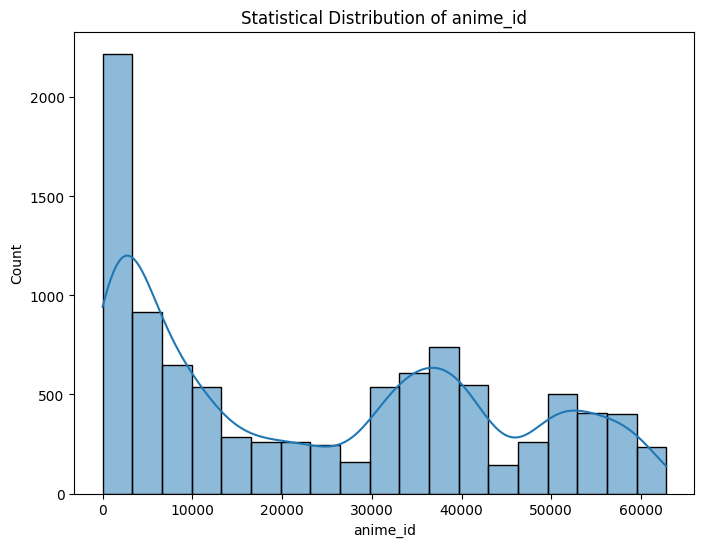

/tmp/ipython-input-4156416167.py:39: UserWarning: Glyph 65343 (\N{FULLWIDTH LOW LINE}) missing from font(s) DejaVu Sans.
  plt.savefig('categorical_plot.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65343 (\N{FULLWIDTH LOW LINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


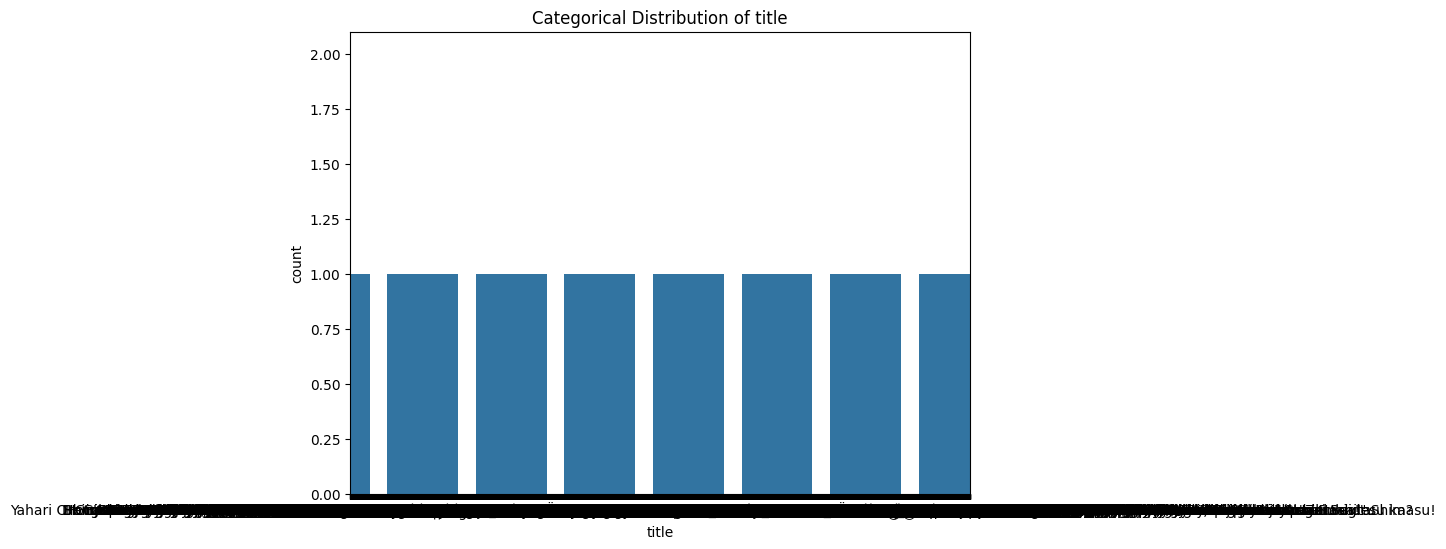


For the attribute anime_id:
Mean = 23922.88, Standard Deviation = 19838.48, Skewness = 0.32, and Excess Kurtosis = -1.33.
The data was not skewed and platykurtic.


In [ ]:
"""
This is the template file for the statistics and trends assignment.
You will be expected to complete all the sections and
make this a fully working, documented file.
You should NOT change any function, file or variable names,
 if they are given to you here.
Make use of the functions presented in the lectures
and ensure your code is PEP-8 compliant, including docstrings.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns


def plot_relational_plot(df):
    """
    Creates a relational scatter plot between two numerical variables.
    """
    # Replace these with actual column names from your data.csv
    x_col, y_col = df.columns[2], df.columns[3]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f"Relational Plot: {x_col} vs {y_col}")
    plt.savefig('relational_plot.png')
    plt.show()
    return


def plot_categorical_plot(df):
    """Creates a bar plot for a categorical variable."""
    cat_col = df.select_dtypes(include=['object', 'category']).columns[0]

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=cat_col)
    plt.title(f"Categorical Distribution of {cat_col}")
    plt.savefig('categorical_plot.png')
    plt.show()
    return


def plot_statistical_plot(df):
    """Creates a histogram to show data distribution."""
    num_col = df.select_dtypes(include=[np.number]).columns[0]

    plt.figure(figsize=(8, 6))
    sns.histplot(df[num_col], kde=True)
    plt.title(f"Statistical Distribution of {num_col}")
    plt.savefig('statistical_plot.png')
    plt.show()
    return


def statistical_analysis(df, col: str):
    """Calculates the four statistical moments."""
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col].dropna())
    excess_kurtosis = ss.kurtosis(df[col].dropna())
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """Basic data cleaning and exploration."""
    print("--- Data Description ---")
    print(df.head(5))
    print(df.describe())
    print("\n--- Correlation Matrix ---")
    print(df.corr(numeric_only=True))

    # Drop rows with missing values as a basic cleaning step
    df = df.dropna()
    return df


def writing(moments, col):
    """Prints analysis summary and interpretations."""
    mean, stddev, skew, kurt = moments
    print(f'\nFor the attribute {col}:')
    print(f'Mean = {mean:.2f}, '
          f'Standard Deviation = {stddev:.2f}, '
          f'Skewness = {skew:.2f}, and '
          f'Excess Kurtosis = {kurt:.2f}.')

    # Logic for interpretation
    skew_type = "right-skewed" if skew > 0.5 else "left-skewed" if skew < -0.5 else "not skewed"
    kurt_type = "leptokurtic" if kurt > 0.5 else "platykurtic" if kurt < -0.5 else "mesokurtic"

    print(f'The data was {skew_type} and {kurt_type}.')
    return


def main():
    #  data.csv contains animal data
    try:
        df = pd.read_csv("data.csv")
    except FileNotFoundError:
        print("Error: data.csv not found.")
        return

    df = preprocessing(df)

    # Set this to a specific numeric column from your CSV
    col = df.select_dtypes(include=[np.number]).columns[0]

    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)

    moments = statistical_analysis(df, col)
    writing(moments, col)
    return


if __name__ == '__main__':
    main()
